In [1]:
# %%
import smtplib
from email.mime.text import MIMEText
import time

# Email configuration
SMTP_SERVER = "smtp.gmail.com"  # For Gmail, change if using Outlook or another service
SMTP_PORT = 465  # SSL port (or use 587 for TLS)
SENDER_EMAIL = "abhaymathur1000@gmail.com"  # Replace with your email
SENDER_PASSWORD = "blom axpb quot zcdv"  # Replace with your email password
RECEIVER_EMAIL = "abhaymathur1000@gmail.com"  # Your email (or another recipient)

def send_email(subject, body=""):
    """Sends an email notification"""
    msg = MIMEText(body)
    msg["Subject"] = subject
    msg["From"] = SENDER_EMAIL
    msg["To"] = RECEIVER_EMAIL

    try:
        with smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT) as server:
            server.login(SENDER_EMAIL, SENDER_PASSWORD)
            server.sendmail(SENDER_EMAIL, RECEIVER_EMAIL, msg.as_string())
        print("Email sent successfully!")
    except Exception as e:
        print(f"Error sending email: {e}")



# Notify when the script completes
# send_email("✅ Script Completed", "Your Python script has finished running.")

start_time = time.time()

def get_time_from_start(start_time):
    elapsed_time = time.time() - start_time
    hours, rem = divmod(elapsed_time, 3600)
    minutes, seconds = divmod(rem, 60)
    return f"{int(hours):02}:{int(minutes):02}:{seconds:05.2f}"

In [2]:
# Import Libraries
import os
import pandas as pd
import kagglehub
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import display, clear_output
import dask.dataframe as dd
import numpy as np

import fastparquet
import pyarrow
import pyarrow.parquet as pq

import matplotlib.pyplot as plt

/home/amathur3/ondemand/DS3010New/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load data and preprocess
def load_data(data_path, n_part):
	if n_part > 0:
		file_count = len([f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))])

		for i in range(min(n_part, file_count)):
			read_df = dd.read_parquet(os.path.join(data_path, f"output_part_{i}.parquet"), engine="pyarrow")
			df_dask = read_df if i == 0 else dd.concat([df_dask, read_df])
	else:
		df_dask = dd.read_parquet(data_path, engine="pyarrow")

	all_df = df_dask.compute()
	return all_df

In [4]:
data = load_data('data/lemm_stop_reviews_parquet', 1)

In [5]:
# display(data.shape)
# display(data.columns)
# display(data.head(5))

In [6]:
# # Get the value counts
# name_counts = data['name'].value_counts()

# name_counts = np.log(name_counts)

# # Plot the value counts
# name_counts.plot(kind='bar')

# # Add title and labels
# plt.title('Name Occurrences')
# plt.xlabel('Names')
# plt.ylabel('Counts')
# # plt.ylim([0, 750])

# # Show the plot
# plt.show()

In [7]:
# coords = (float(data.iloc[0]['latitude']), float(data.iloc[0]['longitude']))

# data['latitude'] = data['latitude'].astype(float)
# data['longitude'] = data['longitude'].astype(float)

# data['lat_diff'] = np.abs(data['latitude'] - coords[0])
# data['lon_diff'] = np.abs(data['longitude'] - coords[1])
# data['pyth_diff'] = np.sqrt(data['lat_diff']**2 + data['lon_diff']**2)

# closest_idx = data['pyth_diff'][data['pyth_diff'] > 0.0].idxmin()
# closest_coords = (float(data.iloc[closest_idx]['latitude']), float(data.iloc[closest_idx]['longitude']))
# closest_diff = data.iloc[closest_idx]['pyth_diff']

# farthest_idx = data['pyth_diff'][data['pyth_diff'] > 0.0].idxmax()
# farthese_coords = (float(data.iloc[farthest_idx]['latitude']), float(data.iloc[farthest_idx]['longitude']))
# farthest_diff = data.iloc[farthest_idx]['pyth_diff']


# print("Coords: ", coords)
# print("Closest Coords: ", closest_coords)
# print("Closest Diff: ", closest_diff)
# print("Farthest Coords: ", farthese_coords)
# print("Farthest Diff: ", farthest_diff)


In [8]:
# density_lists = [0.029, 45]

In [9]:
# # Define the minimum and maximum values
# min_val = 0.029
# max_val = 45

# # Define the number of points in the range
# num_points = 20

# # Create an exponential range from min_val to max_val
# exp_range = np.logspace(np.log10(min_val), np.log10(max_val), num=num_points)

# print("Exponential range from MIN to MAX:")
# print(exp_range)

In [10]:
# data['latitude'] = data['latitude'].astype(float)
# data['longitude'] = data['longitude'].astype(float)

# fig, axes = plt.subplots(nrows=len(exp_range), ncols=1, figsize=(10, 5 * len(exp_range)))

# for idx, val in enumerate(exp_range):
#     for i in range(len(data)):
#         lat, long = data.iloc[i]['latitude'], data.iloc[i]['longitude']
#         data['lat_diff'] = np.abs(data['latitude'] - lat)
#         data['lon_diff'] = np.abs(data['longitude'] - long)
#         data['pyth_diff'] = np.sqrt(data['lat_diff']**2 + data['lon_diff']**2)
#         data['density'] = len(data[data['pyth_diff'] < val])
#     plot_data = data['density'].value_counts()
#     plot_data.plot(kind='bar', ax=axes[idx])
#     axes[idx].set_title(f'Density Occurrences for exp_range value: {val}')
#     axes[idx].set_xlabel('Density')
#     axes[idx].set_ylabel('Counts')

# plt.tight_layout()
# fig.savefig(os.path.join('images', 'density_subplots.png'))
# # plt.show()


In [11]:
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd

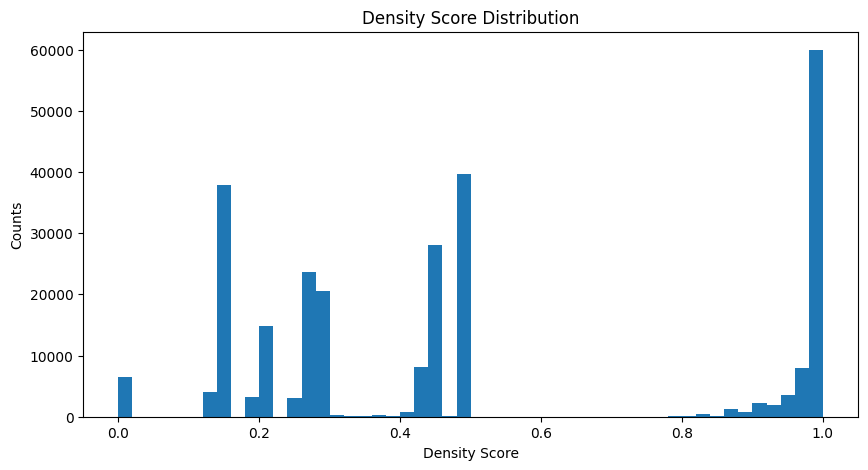

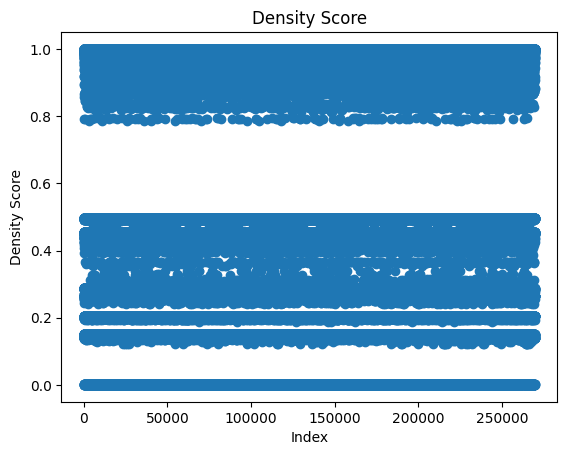

Email sent successfully!


In [12]:
# Extract latitude and longitude as a 2D array

# data = data.sample(n=1000)

coords = data[['latitude', 'longitude']].values.T

# Perform Kernel Density Estimation
kde = gaussian_kde(coords)

# Evaluate the density score for each point
density_scores = kde(coords)

# Add the density scores to the DataFrame
data['density_score'] = density_scores

data['density_score'] = data['density_score'].astype(float)

# Normalize density_score
data['density_score'] = (data['density_score'] - data['density_score'].min()) / (data['density_score'].max() - data['density_score'].min())

# Plot a distribution of the density scores
plt.figure(figsize=(10, 5))
plt.hist(data['density_score'], bins=50)
plt.title('Density Score Distribution')
plt.xlabel('Density Score')
plt.ylabel('Counts')
plt.show()


plt.scatter([i for i in range(len(data['density_score']))], data['density_score'])
plt.title('Density Score')
plt.xlabel('Index')
plt.ylabel('Density Score')
plt.show()

send_email("✅ Density Script Completed", "Your Python script has finished running\nTime taken: " + get_time_from_start(start_time))
